In [1]:
from math import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

peliculasDf=pd.read_csv("movies.csv")
arr=np.array(peliculasDf.iloc[:,])

data=dict()

for i in arr:
    indice=int(i[0])
    data[indice]=i

Primero vamos a revisar los datos como están formados, como podemos ver se tienen 10865 datos, con cada uno de dimensionalidad 21, considerando id, ganancias perdidas presupuestos y ratings, que son los datos numéricos que vamos a usar inicialmente

In [2]:
print(len(data[135397]))
print(len(data))

21
10865


# ¿Qué variables tiene el conjunto de datos?

Descripcion estadistica de los campos del dataset y vista de los titulos, los campos con los que cuentan los datos son los siguientes:

id	imdb_id	popularity	budget	revenue	original_title	cast	homepage	director	tagline	keywords	overview	runtime	genres	production_companies	release_date	vote_count	vote_average	release_year	budget_adj	revenue_adj

In [3]:
peliculasDf.describe()

,id,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [4]:
print(arr)

[[135397 'tt0369610' '32.985.763' ... 2015 '137.999.939.280.026'
  '13.924.458.925.238']
 [76341 'tt1392190' '28.419.936' ... 2015 '137.999.939.280.026'
  '348.161.292.489.031']
 [262500 'tt2908446' '13.112.507' ... 2015 '101.199.955.472.019'
  '271.619.025.407.628']
 ...
 [39768 'tt0060161' '651.409.999.999.999' ... 1966 '0' '0']
 [21449 'tt0061177' '64.317' ... 1966 '0' '0']
 [22293 'tt0060666' '35.919' ... 1966 '127.642.279.153.664' '0']]


# ¿Existe algún problema de calidad en los datos?

Contabilizamos y evaluamos los valores nan y null 

In [5]:
peliculasDf.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
peliculasDf.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Buscamos datos duplicados para eliminar

In [7]:
sum(peliculasDf.duplicated())

1

Eliminamos los duplicados

In [8]:
print('Antes de eliminar duplicados : ' , peliculasDf.shape)
peliculasDf.drop_duplicates(inplace = True)
print('Eliminando duplicados : ' , peliculasDf.shape)

Antes de eliminar duplicados :  (10866, 21)
Eliminando duplicados :  (10865, 21)


Llenamos de manera provisional los datos faltantes para poder sacar las sumatorias numéricas

In [9]:
#llenado con 0s de los datos faltantes
peliculasDf.fillna(0, inplace = True)

Contamos el número de películas con 0 ingresos, lo cual es imposible y es producto de no tener datos y haber reemplazado los mismos con 0

In [10]:
print('peliculas con 0 ingreso ', peliculasDf[peliculasDf['revenue'] == 0]['id'].count())

peliculas con 0 ingreso  6016


Contamos el número de películas con 0 presupuesto, lo cual también es grupo de datos faltantes en el dataset

In [11]:
print('peliculas con 0 presupuesto ', peliculasDf[peliculasDf['budget'] == 0]['id'].count())

peliculas con 0 presupuesto  5696


Contamos el numero de peliculas que tiene ambos problemas anteriores

In [12]:
print('peliculas con 0 ingreso y presupuesto ', peliculasDf[(peliculasDf['budget'] == 0) & (peliculasDf['revenue'] == 0)]['id'].count())

peliculas con 0 ingreso y presupuesto  4701


Como pudimos ver los datos tiene vacios que tienen que serconsiderados al momento de hacer los calculos, porque pueden afectar los resultados

# Pregunta 1: ¿Cómo es el desarrollo de los ingresos, ganancias, presupuesto y cantidad de películas a los datos recopilados?

release_year
2014    700
Name: id, dtype: int64


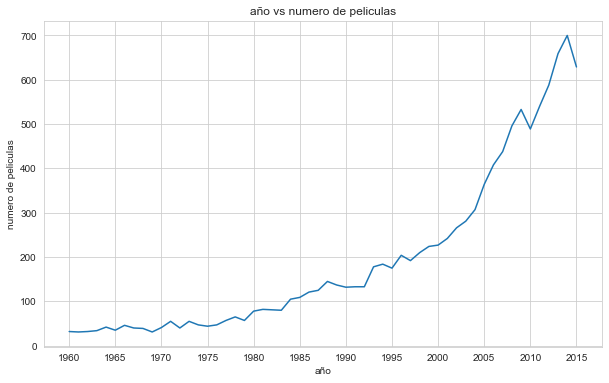

In [47]:
movies_number_in_year = peliculasDf.groupby('release_year').count()['id'] 
print(movies_number_in_year.sort_values(ascending = False)[ : 1])
movies_number_in_year.plot(xticks = np.arange(1960, 2016, 5), figsize = (10,6))
plt.title('año vs numero de peliculas')
plt.xlabel('año')
plt.ylabel('numero de peliculas')
sns.set_style('whitegrid')

Agregamos la columna de las ganancias netas etiquetada por su nombre en inglés profit

In [14]:
peliculasDf['profit'] = peliculasDf['revenue'] - peliculasDf['budget']
peliculasDf['profit'].replace(0 ,np.nan, inplace = True)

release_year
2015    1.916590e+10
Name: profit, dtype: float64


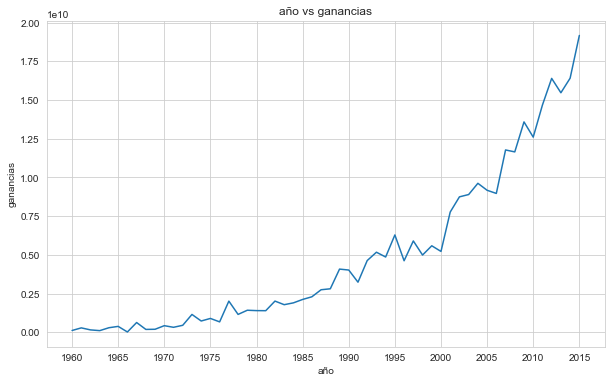

In [15]:
movies_profit = peliculasDf.groupby('release_year').sum()['profit'];
print(movies_profit.sort_values(ascending = False)[ : 1])
movies_profit.plot(xticks = np.arange(1960, 2016, 5), figsize = (10,6))
plt.title('año vs ganancias')
plt.xlabel('año')
plt.ylabel('ganancias')
sns.set_style('whitegrid')

release_year
2015    26762450518
Name: revenue, dtype: int64


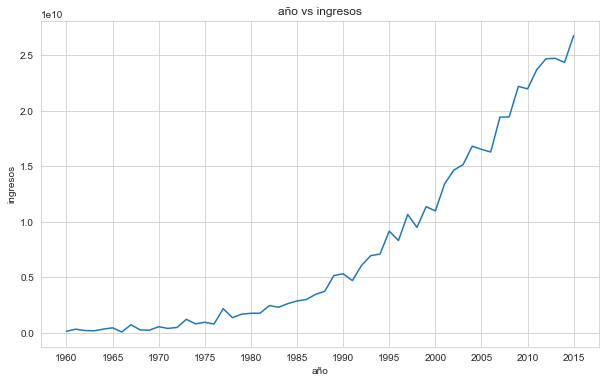

In [16]:
movies_profit = peliculasDf.groupby('release_year').sum()['revenue'];
print(movies_profit.sort_values(ascending = False)[ : 1])
movies_profit.plot(xticks = np.arange(1960, 2016, 5), figsize = (10,6))
plt.title('año vs ingresos')
plt.xlabel('año')
plt.ylabel('ingresos')
sns.set_style('whitegrid')

release_year
2010    9355001006
Name: budget, dtype: int64


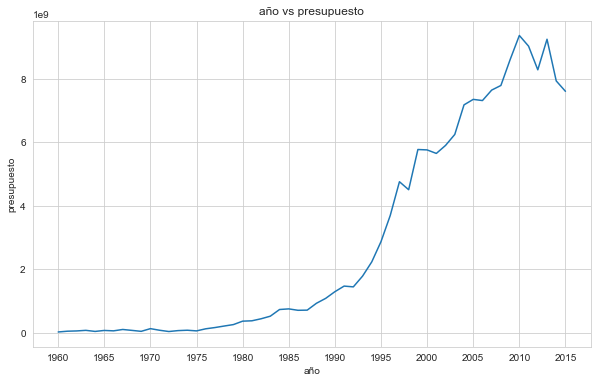

In [17]:
movies_profit = peliculasDf.groupby('release_year').sum()['budget'];
print(movies_profit.sort_values(ascending = False)[ : 1])
movies_profit.plot(xticks = np.arange(1960, 2016, 5), figsize = (10,6))
plt.title('año vs presupuesto')
plt.xlabel('año')
plt.ylabel('presupuesto')
sns.set_style('whitegrid')

release_year
2013    214486
Name: vote_count, dtype: int64


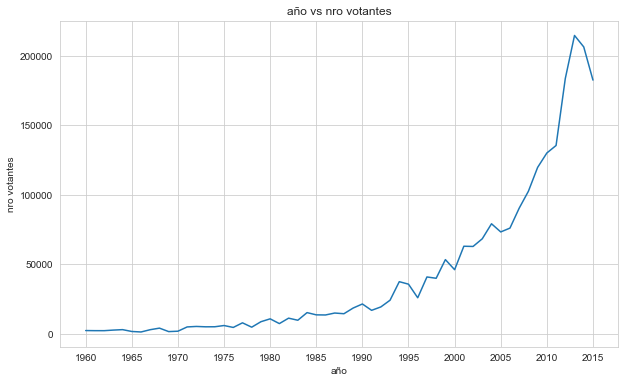

In [50]:
movies_profit = peliculasDf.groupby('release_year').sum()['vote_count'];
print(movies_profit.sort_values(ascending = False)[ : 1])
movies_profit.plot(xticks = np.arange(1960, 2016, 5), figsize = (10,6))
plt.title('año vs nro votantes')
plt.xlabel('año')
plt.ylabel('nro votantes')
sns.set_style('whitegrid')

Hallamos las peliculas con mayor y menor ganacia

# Pregunta 2: ¿Cuales fueron las peliculas con mayor presupuesto, ganancia e  ingresos?

In [18]:
def min_max(df, col) :
    max_ = df[col].idxmax()
    min_ = df[col].idxmin()
    highest_movie = df['original_title'][max_]
    lowest_movie = df['original_title'][min_]
    return  highest_movie, lowest_movie

highest_movie, lowest_movie = min_max(peliculasDf, 'profit')
print('pelicula con mayor ganancia ', highest_movie)
print('pelicula con peor ganancia ', lowest_movie)

pelicula con mayor ganancia  Avatar
pelicula con peor ganancia  The Warrior's Way


Peliculas con mayores ganancias

In [48]:
highest_movies = peliculasDf.sort_values(by = 'profit', ascending = False)[:10]
highest_movies.loc[: , ['original_title', 'profit','popularity']]

,original_title,profit,popularity
1386,Avatar,2544505847,9.432.768
3,Star Wars: The Force Awakens,1868178225,11.173.104
5231,Titanic,1645034188,4.355.219
0,Jurassic World,1363528810,32.985.763
4,Furious 7,1316249360,9.335.014
4361,The Avengers,1299557910,7.637.767
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,5.711.315
14,Avengers: Age of Ultron,1125035767,5.944.927
5422,Frozen,1124219009,6.112.766
8094,The Net,1084279658,113.661


Peliculas con mayor presupuesto

In [20]:
highest_bud_movie, lowest_bud_movie = min_max(peliculasDf, 'budget')
print('pelicula con mayor presupuesto ', highest_bud_movie)
print('pelicula con menor presupuesto ', lowest_bud_movie)

pelicula con mayor presupuesto  The Warrior's Way
pelicula con menor presupuesto  Mr. Holmes


Peliculas con mayores presupuestos

In [21]:
highest_movies = peliculasDf.sort_values(by = 'budget', ascending = False)[:10]
highest_movies.loc[: , ['original_title', 'budget']]

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000
1929,Tangled,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
4367,The Hobbit: An Unexpected Journey,250000000


Tiempo de duracion debe ser mayor a 0

In [22]:
peliculasDf.query('runtime>=0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985.763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999.939.280.026,13.924.458.925.238,1.363529e+09
1,76341,tt1392190,28.419.936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999.939.280.026,348.161.292.489.031,2.284364e+08
2,262500,tt2908446,13.112.507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199.955.472.019,271.619.025.407.628,1.852382e+08
3,140607,tt2488496,11.173.104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999.919.040.035,190.272.312.980.182,1.868178e+09
4,168259,tt2820852,9.335.014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799.923.088.033,138.574.880.147.052,1.316249e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,80.598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0,0,NaN
10862,20379,tt0060472,655.429.999.999.999,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0,0,NaN
10863,39768,tt0060161,651.409.999.999.999,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0,0,NaN
10864,21449,tt0061177,64.317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0,0,NaN


# Pregunta 3: ¿Cuál es la relación que tienen los ingresos, ganancias y presupuestos asignados? y ¿Cómo están distribuidas las variables?

Relacion presupuesto vs ingresos

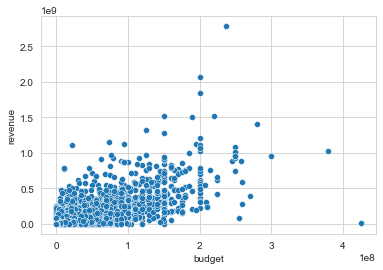

In [23]:
sns.scatterplot(data=peliculasDf, x="budget", y="revenue");

Relacion presupuesto vs ganancias

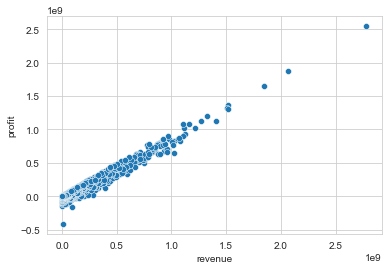

In [24]:
sns.scatterplot(data=peliculasDf, x="revenue", y="profit");

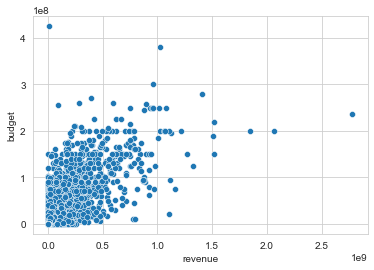

In [25]:
sns.scatterplot(data=peliculasDf, x="revenue", y="budget");

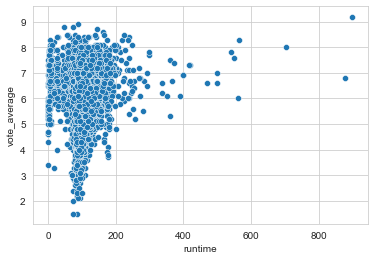

In [51]:
sns.scatterplot(data=peliculasDf, x="runtime", y="vote_average");

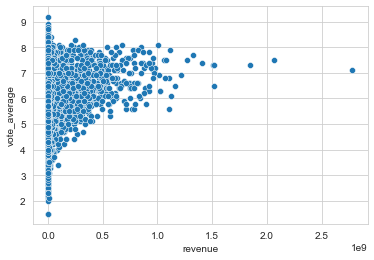

In [54]:
sns.scatterplot(data=peliculasDf, x="revenue", y="vote_average");

Como podemos ver las variables están agrupadas en un solo grupo aparentemente, solo para el caso de ingresos y ganancias hay un crecimiento, el cual se da por el porcentaje de ganancia que se tiene reflejado.

# Pregunta 4: ¿Cuáles son los actores con mayor participación?

Cual es el actor mas frecuente

In [26]:
peliculasDf=pd.read_csv("movies.csv")
peliculasDf.drop_duplicates(inplace = True)
peliculasDf['profit']=peliculasDf.revenue-peliculasDf.budget

In [27]:
cast_count = pd.Series(peliculasDf['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Liam Neeson           48
Susan Sarandon        48
Alec Baldwin          47
Julianne Moore        47
Johnny Depp           46
Tom Hanks             46
Christopher Walken    46
Gene Hackman          46
Dennis Quaid          45
Willem Dafoe          45
Sylvester Stallone    45
dtype: int64

Mostrando como grafica

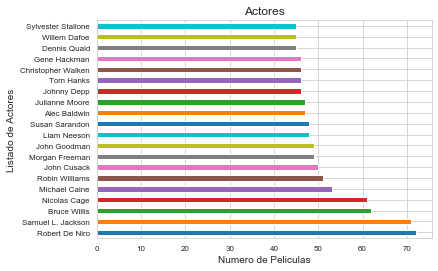

In [28]:
cmap = plt.cm.tab10
colors = cmap(np.arange(len(peliculasDf)) % cmap.N)
diagram = cast_count.head(20).plot.barh(fontsize = 8,color=colors)
diagram.set(title = 'Actores')
diagram.set_xlabel('Numero de Peliculas')
diagram.set_ylabel('Listado de Actores')
plt.show()

Analizando las 100 primeras películas más votadas

In [29]:
df100R=peliculasDf.sort_values(by='vote_average',ascending=False)
df100R=df100R[['original_title','vote_average']].head(100)
df100R.head(10)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5


La pelicula mejor votada es

In [30]:
df100R.head(1)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2


Calificacion de la pelicula mas votada

Text(0.5, 1.0, 'Votos Promedio')

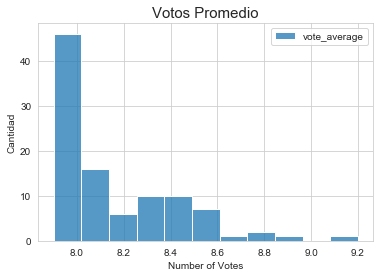

In [31]:
sns.histplot(data=df100R)
plt.xlabel("Number of Votes", size=10)
plt.ylabel("Cantidad", size=10)
plt.title("Votos Promedio", size=15)

Escogemos las películas más votadas

In [32]:
df100R=peliculasDf.sort_values(by='vote_average',ascending=False)
df100R=df100R[['original_title','vote_average']].head(100)
df100R.head(10)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5


Datos de las top 100 Peliculas mas rankeadas

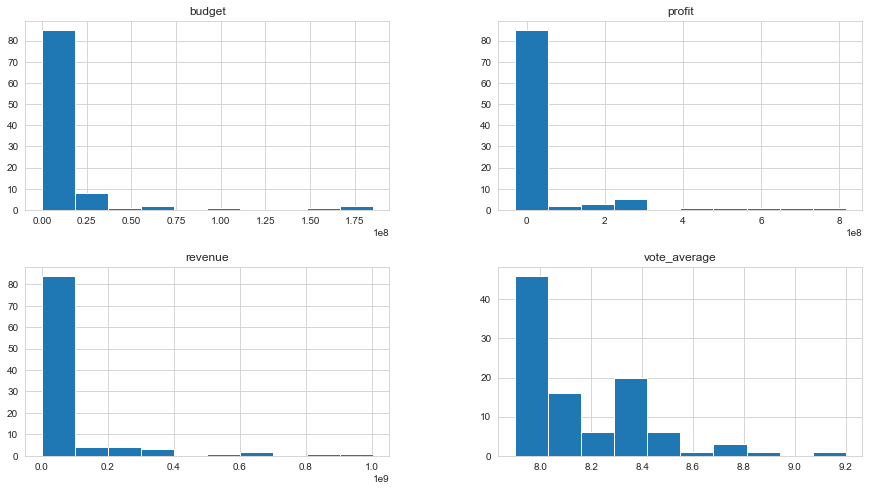

In [33]:
df100=peliculasDf.sort_values(by='vote_average',ascending=False)
df100=df100[['original_title','vote_average','budget','revenue','profit','genres','cast']].head(100)
df100.hist(figsize=(15,8));

Promedio de presupuesto de las 100 peliculas mas rankeadas

In [34]:
df100['budget'].mean()

10993070.58

Promedio de ingreso de las 100 peliculas mas rankeadas

In [35]:
df100['revenue'].mean()

65806552.37

# Pregunta 5: ¿Cuáles son los géneros que mas importantes en las top 500 películas más populares?

# Pregunta 6: ¿Cuáles son los actores que más aparecen en las top 500 películas más populares?

Datos de las top 500 Peliculas mas populares

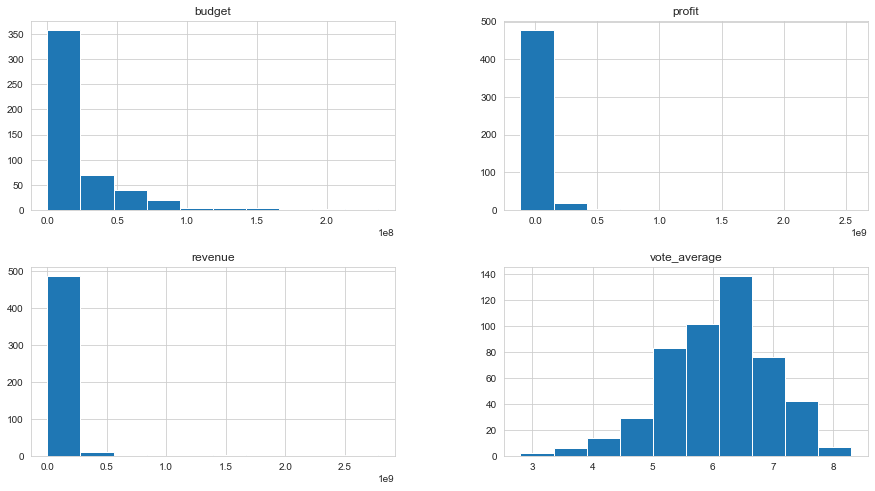

In [36]:
df500=peliculasDf.sort_values(by='popularity',ascending=False)
df500=df500[['original_title','vote_average','budget','revenue','profit','genres','cast']].head(500)
df500.hist(figsize=(15,8));

Promedio de presupuesto de las 500 peliculas mas populares

In [37]:
df500['budget'].mean()

19232055.756

Promedio de ingreso de las 500 peliculas mas populares

In [38]:
df500['revenue'].mean()

50071358.952

Conteo de los generos de peliculas mas populares

In [39]:
genres_count = pd.Series(df500['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              202
Comedy             186
Thriller           150
Action             119
Romance             77
Horror              72
Crime               71
Adventure           68
Family              56
Science Fiction     50
Mystery             47
Fantasy             42
Animation           32
Documentary         18
Music               16
History             15
War                 10
Foreign              9
TV Movie             7
Western              5
dtype: int64

In [45]:
genres_count = pd.Series(peliculasDf['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

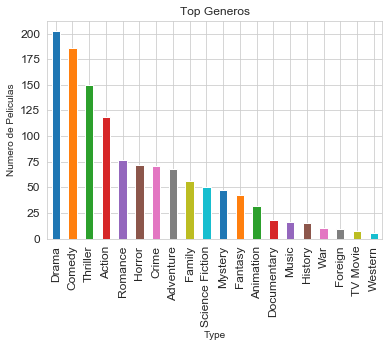

In [40]:
cmap = plt.cm.tab10
colors = cmap(np.arange(len(peliculasDf)) % cmap.N)
diagram = genres_count.plot.bar(fontsize = 12,color=colors)
plt.title('Top Generos')
plt.xlabel('Type')
plt.ylabel('Numero de Peliculas')
plt.show();

Actores que participaron mas en las top peliculas mas populares

In [41]:
actor_count = pd.Series(df500['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
actor_count.head(20)

Sean Penn           6
Mel Gibson          6
John Cusack         6
Meryl Streep        6
Bill Nighy          5
Emma Roberts        5
Anna Faris          5
Josh Lucas          5
Robin Williams      4
Antonio Banderas    4
Maggie Smith        4
Oliver Platt        4
Anthony Hopkins     4
Tom Hanks           4
Tom Wilkinson       4
Naomi Watts         4
Adrien Brody        4
Steve Buscemi       4
John Goodman        4
Willem Dafoe        4
dtype: int64

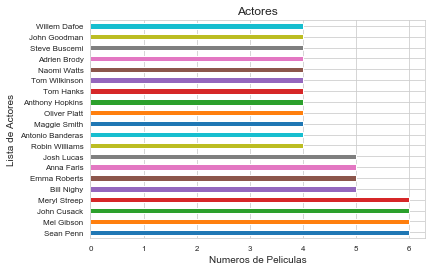

In [42]:
cmap = plt.cm.tab10
colors = cmap(np.arange(len(peliculasDf)) % cmap.N)
diagram = actor_count.head(20).plot.barh(fontsize = 8,color=colors)
diagram.set(title = 'Actores')
diagram.set_xlabel('Numeros de Peliculas')
diagram.set_ylabel('Lista de Actores')
plt.show()

Respuestas Pregunta 3: 

In [43]:
genres_count.head(5)

Drama       202
Comedy      186
Thriller    150
Action      119
Romance      77
dtype: int64

Respuestas Pregunta 4: 

In [44]:
actor_count.head(5)

Sean Penn       6
Mel Gibson      6
John Cusack     6
Meryl Streep    6
Bill Nighy      5
dtype: int64

In [53]:
palabras = pd.Series(peliculasDf['keywords'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
palabras.head(20)

woman director          413
independent film        396
based on novel          278
sex                     272
sport                   216
murder                  204
biography               169
musical                 169
new york                163
suspense                159
nudity                  154
duringcreditsstinger    152
female nudity           149
prison                  140
revenge                 137
dystopia                136
high school             135
sequel                  130
london                  123
suicide                 115
dtype: int64